# Предобработка данных и функции потерь в линейной регрессии

## Данные
На семинаре мы будем работать с набором данных [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [1]:
import numpy as np
import pandas as pd

X_raw = pd.read_csv("cars.csv", header=None, na_values=["?"])

In [2]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Предобработка данных
Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью модуля [preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [3]:
from sklearn import preprocessing

### Преобразование нечисловых признаков
Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества $K$. К таким признакам обычно применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) (вместо одного признака создают $K$ бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать следующим образом:

In [4]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values # категориальные признаки имеют тип "object"

In [5]:
# кодирование категорий-строк натуральными числами
label_enc = preprocessing.LabelEncoder()
for feature in X_raw.columns[cat_features_mask]: 
    X_raw[feature] = label_enc.fit_transform(X_raw[feature])

/usr/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [6]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
# применение one-hot ecnoding
enc = preprocessing.OneHotEncoder(sparse=False)
X_cat_np = enc.fit_transform(X_raw[X_raw.columns[cat_features_mask]])
X_cat_pd = pd.DataFrame(data=X_cat_np)

In [8]:
print X_cat_pd.shape
X_cat_pd.head()

(205, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Следует заметить, что в новой матрице очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр OneHotEncoder(sparse = True), и метод fit_transform вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

__Вопрос:__ какая проблема возникнет при применении такого способа кодирования для обучения линейной регрессии?
    
Необходимо удалить один из столбцов, созданных для каждого признака (его легко вычислить из остальных):

In [9]:
X_cat_pd.drop(enc.feature_indices_[:-1], axis=1, inplace=True)

Помимо категориальных, преобразования требуют, например, строковые признаки. Их можно превращать в матрицу частот слов [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), матрицу частот буквосочетаний фиксированной длины, можно извлекать другие признаки (например, длина строки).

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Последний вариант сложный и применяется редко. Замена пропусков средними в вещественных признаках:

In [10]:
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = preprocessing.Imputer(strategy="mean")
X_no_mis = pd.DataFrame(data=mis_replacer.fit_transform(X_real))

In [11]:
X_no_mis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Всегда нужно осознавать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

__Пример:__ предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению. В наши данных пропусков в категориальных признаках нет.

In [12]:
# проверка пропусков в категориальных признаках
np.any(np.isnan(X_cat_pd))

False

In [13]:
# проверка пропусков после применения Imputer
np.any(X_no_mis.isnull())

False

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу.  Это важно по нескольким причинам:
* ускорение обучения модели (пояснение на лекции);
* улучшение численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел)
* для линейных моделей: интерпретация весов при признаках как меры их значимости.

Первый популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение. Реализация в sklearn (нормировать бинарные признаки не нужно):

In [14]:
normalizer = preprocessing.StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_no_mis)
X_real_norm_pd = pd.DataFrame(data=X_real_norm_np)

Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения. Реализация в sklearn:

In [15]:
mm_scaler = preprocessing.MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X_no_mis)

Объдиняем категориальные и вещественные признаки:

In [16]:
X = pd.concat([X_real_norm_pd, X_cat_pd], axis=1)
X.columns = np.array(["f"+str(i) for i in range(X.shape[1])])

In [17]:
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Добавление полиномиальных признаков
Генерировать все полиномиальные признаки можно следующим образом:

In [18]:
pol_feat = preprocessing.PolynomialFeatures(degree=2, include_bias=False) # не включать константный признак
X_pol = pol_feat.fit_transform(X)

In [19]:
X.shape, X_pol.shape

((205, 67), (205, 2345))

Обратите внимание, что новая матрциа может занимать очень много памяти. Генерация полиномиальных признаков нужна, например, в случае, если вы хотите с помощью линейной регрессии настраивать полиномиальную модель зависимости целевого признака от данных.

## Функции потерь в регрессии

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(a) = \frac 1 \ell \sum_{i=1}^\ell L(y_i, a(x_i)),$$
где $L(\cdot, \cdot)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. Свойства функции потерь:
* $L(y_i, a(x_i)) \geqslant 0$;
* $L(y_i, y_i) = 0$. 

Как отмечалось на первой лекции, функционал качества должен в первую очередь отвечать требованиям заказчика, при этом математические свойства функции потерь могут быть неудобны для оптимизации. 

__Пример:__ если мы не различаем маленькие ошибки (между 0.01 и 0.1 нет особой разницы), но зато не хотим получать большие ошибки, можно использовать следующую функцию потерь:

$$L(y_i, a(x_i)) = [| y_i - a(x_i) | < \varepsilon],$$ $\varepsilon$ - допустимая разница между предсказанием и фактом.


### Среднеквадратичная и средняя абсолютная ошибка
Кроме требований заказчика, функционал качества должен учитывать математические особенности модели, например устойчивость к шумовым объектам. В линейной регрессии Mean Squared Error: $L(y_i, a(x_i)) = (a(x_i) - y_i)^2$ не обладает этим свойством, потому что задает очень большие штрафы за большие отклонения от фактического значения. 

Рассмотрим это явление на примере. Выберем один признак, от которого целевой признак (имеющий индекс 15 в матрице X) зависит практически линейно. Добавим к выборке два объекта-выброса и посмотрим, как изменится оптимизированная на MSE прямая.

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

In [21]:
X_subset = X[["f7", "f15"]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]])) # добавление двух шумовых точек

In [22]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    lr = LR()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])  # найдем веса линейной модели
    grid = np.linspace(-2, 6, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)   # визуализируем прямую

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


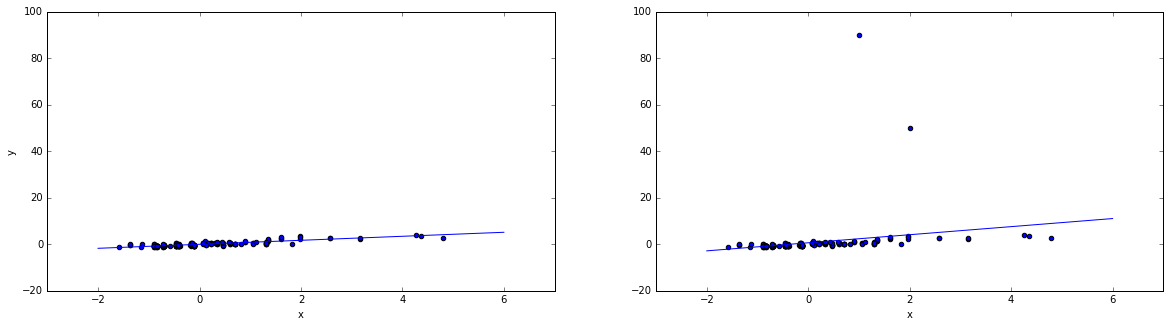

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error: $L(y_i, a(x_i)) = |a(x_i) - y_i|$:

Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
def scatter_points_and_plot_line_MAE(X_subset):
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
    res = mod.fit(q=0.5)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    grid = np.linspace(-2, 6, 100)
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
    return mod, res

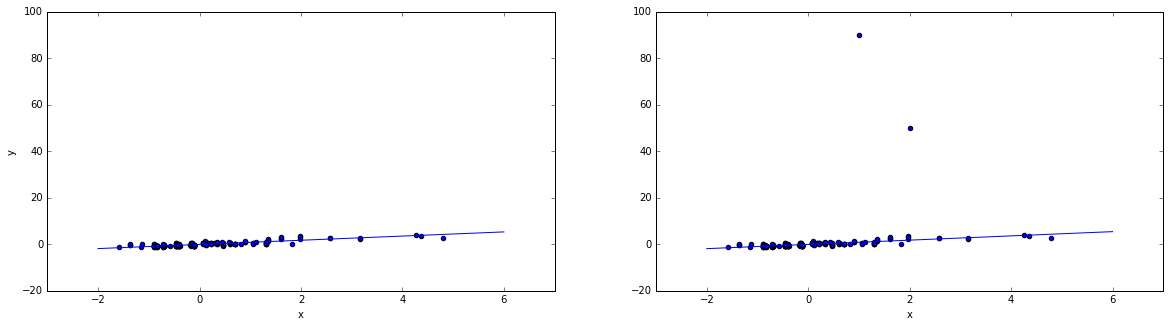

In [26]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [27]:
X_subset_modified_twice = np.vstack((X_subset_modified, np.random.randint(5, size=60).reshape(-1, 2)*[1, 30])) # добавление двух шумовых точек

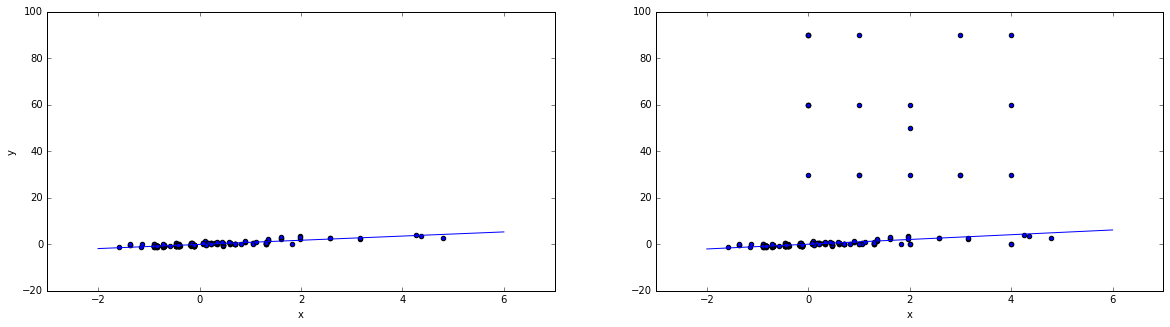

In [28]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая немного изменила наклон, когда мы добавили 30 (почти 15%) шумовых точек.

Рассмотрим некоторые свойства MSE и MAE.

Пусть алгоритм возвращает константный ответ: $a(x) = C$. Такие алгоритмы используются, когда для одного объекта известны несколько различных значений одного целевого признака (например, суммы покупок в одном магазине).

__Задача.__ Найдите $C$, минимизирующий среднеквадратичную ошибку.

_Решение._ $$MSE(C) = \frac{1}{\ell} \sum_{i=1}^\ell (C - y_i)^2$$
$$\frac{\partial MSE (C)}{\partial C} = \frac{1}{\ell} \sum_{i=1}^\ell 2 (C - y_i) = 2 C - \frac{1}{\ell} \sum_{i=1}^\ell 2 y_i = 0$$
$$C = \frac 1 \ell \sum_{i=1}^\ell y_i$$.

__Задача.__ Найдите $C$, минимизирующий среднюю абсолютную ошибку.

_Решение._ $$MAE(C) =  \frac{1}{\ell} \sum_{i=1}^\ell |C - y_i|$$

Покажем, что минимум MAE достигается при $C = median(y_1, \dots, y_\ell) = m.$ Рассмотрим $C < m$.

$$|y_i - C| - |y_i - m| = \begin{cases} C - m, y_i < m  \\ - (C + m - 2 y_i), C \leqslant y_i \leqslant m \\ - (C - m), y_i > m \end{cases}$$
$$|y_i - C| - |y_i - m| \geqslant - (C - m) + 2(C - m) [y_i \leqslant m]$$
Суммируем по i:
$$\ell MAE(C) - \ell MAE(m) \geqslant - \ell (C - m) + 2 (C - m) \sum_{i=1}^\ell [y_i \leqslant m]$$

Так как m - медиана, $\sum_{i=1}^\ell [y_i \leqslant m] \geqslant \frac \ell 2$. Тогда

$$\ell MAE(C) - \ell MAE(m) \geqslant - \ell (C - m) + 2 (C - m) \frac \ell 2 = 0.$$

Итак, для $C < m$ выполняется $MAE(C) \geqslant MAE(m)$. Аналогично показывается, что при для $C > m$ выполняется $MAE(C) \geqslant MAE(m)$.

Поскольку средняя абсолютная ошибка не является дифференцируемой по $w$ функцией, оптимизировать ее напрямую методом градиентного спуска не удастся. Для этого используются субградиентные или другие методы. Один из способов оптимизации MAE будет рассмотрен ниже.

### Huber Loss
Иногда используют "гибрид" MAE и MSE, который, как и MAE, устойчив к шумовым объектам, и как и MSE, мало штрафует малые отклонения от фактического значени целевого признака - Huber Loss:
$$L(y_i, a(x_i)) = \phi_\varepsilon(a(x_i) - y_i)$$
$$\phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}$$

Легко проверить, что у этой функции существует непрерывная первая проиводная во всех точках.

Оптимизация Huber Loss реализована в sklearn:

In [ ]:
from sklearn.linear_model import HuberRegressor

### Quantile Loss

В некоторых задачах штраф за ошибку зависит не только от величины абсолютного отклонения от фактического значения, но и от знака этого отклонения. Например, лучше предсказать спрос больше, чем будет по факту, чем меньше, потому что в первом случае будет потеряна прибыль. В этом случае используется квантильная регрессия со следующей функцией потерь:
$$L(y_i, a(x_i)) = \rho_\tau(y_i - x_i^T w),$$
$$\rho_\tau(z) = \begin{cases} \tau z, \quad z > 0, \\ (\tau - 1) z, \quad z \leqslant 0 \end{cases}$$
Параметр $\tau$ влияет на то, насколько различаются штрафы за положительную и отрицательную разницу.

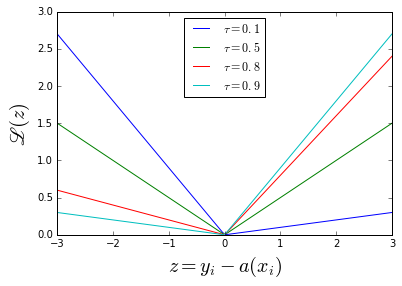

In [30]:
grid = np.linspace(-3, 3, 100)
tau_list = [0.1, 0.5, 0.8, 0.9]
for tau in tau_list:
    plt.plot(grid, tau * grid * (grid > 0) + (tau - 1) * grid * (grid <= 0), label=r"$\tau = " + str(tau) + r"$")
plt.xlabel(r'$z = y_i - a(x_i)$', size=20)
plt.ylabel(r'$\mathscr{L}(z)$', size=20)
plt.legend(loc=0)

Изобразим график квантильной функции потерь вместе с другими рассмотренными:

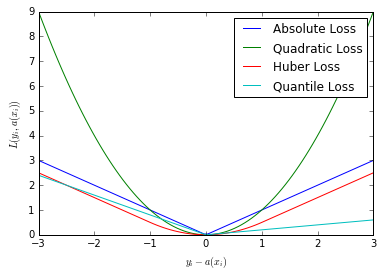

In [31]:
grid = np.linspace(-3, 3, 100)
quantile_tau = 0.2
mse_loss = grid ** 2
mae_loss = np.abs(grid)
huber_loss = 0.5 * mse_loss * (grid >= -1) * (grid <= 1) + (mae_loss - 0.5) * (grid < -1) + (mae_loss - 0.5)  * (grid > 1)
quantile_loss = quantile_tau * grid * (grid > 0) + (quantile_tau - 1) * grid * (grid <= 0)
plt.plot(grid, mae_loss, label="Absolute Loss")
plt.plot(grid, mse_loss, label="Quadratic Loss")
plt.plot(grid, huber_loss, label="Huber Loss")
plt.plot(grid, quantile_loss, label="Quantile Loss")
plt.xlabel("$y_i - a(x_i)$")
plt.ylabel("$L(y_i, a(x_i))$")
plt.legend()

__Задача.__ Укажите параметр $\tau$, при котором обучение квантильной регрессии равносильно оптимизации MAE.

_Решение._ При $\tau = \frac 1 2$ $$\rho_\tau(x) = \frac 1 2 |x|$$ и $L(y_i, a(x_i)) = \frac 1 2 MAE$.

#### Обучение квантильной регрессии как задача линейного программирования
Как и в случае с MAE, функция потерь не дифференцируема в 0. Однако задачу оптимизации MAE можно свести к задаче линейного программирования, для которой известны эффективные алгоритмы решения ([Симплекс-метод](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81-%D0%BC%D0%B5%D1%82%D0%BE%D0%B4)). Задача линейного программирования в общем виде задается  следующем виде:
$$\langle c, x \rangle \rightarrow \min_{x}$$
$$Ax = b$$
$$x \geqslant 0$$

__Задача.__ Рассмотрим задачу оптимизации $$\sum_{i=1}^\ell \rho_\tau(y_i - x_i^T w) \rightarrow \min _{w}.$$
Сведите эту задачу к задаче линейного программирования.

_Решение._ Введем переменные:
$$e_i = y_i - x_i^T w$$
$$u_i = max\{e_i, 0\} \geqslant 0$$
$$v_i = max\{-e_i, 0\} \geqslant 0$$
Тогда $u_i - v_i = e_i$,

$$ \rho_\tau(y_i - x_i^T w) = \rho_\tau(e_i) = \rho_\tau(u_i - v_i) = \tau u_i + (1 - \tau) v_i. $$
Последний переход можно проверить непосрдственно. Например, если $e_i \geqslant 0$, то $v_i = 0$,
$$\rho_\tau(e_i) = \tau (u_i - v_i) = \tau (u_i - v_i) + v_i = \tau u_i + (1 - \tau) v_i.$$ Аналогично при $e_i < 0$.

Функционал качества:
$$\sum_{i=1}^\ell \rho_\tau(y_i - x_i^T w) = \sum_{i=1}^\ell \bigl (\tau u_i + (1 - \tau) v_i \bigr) = \tau \sum_{i=1}^\ell u_i + (1 - \tau) \sum_{i=1}^\ell v_i = \tau \langle 1, u \rangle + (1 - \tau) \langle 1, v \rangle ,$$
$1 = (1, \dots, 1) \in R^\ell$, $u = (u_1, \dots, u_\ell$), $v = (v_1, \dots, v_\ell)$.

Задача линейного программирования:

$$\tau \langle 1, u \rangle + (1 - \tau) \langle 1, v \rangle \rightarrow \min_{u, v, w}$$
$$y - X w = u - v$$
$$u \geqslant 0, \quad v \geqslant 0$$

Проследим наклон прямой в нашей одномерной задаче регрессии при изменении $\tau$:

/Library/Python/2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Library/Python/2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)


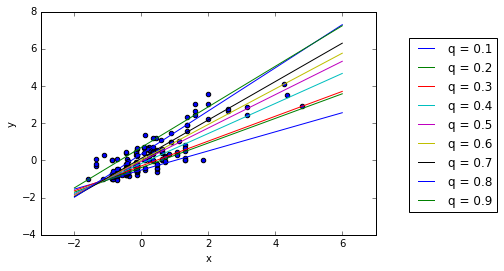

In [32]:
plt.scatter(X_subset[:, 0], X_subset[:, 1])
grid = np.linspace(-2, 6, 100)
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"]))
for q in np.arange(0.1, 1, 0.1):
    res = mod.fit(q=q)
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"], label="q = "+str(q))
plt.legend(loc=(1.1, 0.1))
plt.xlabel("x")
plt.ylabel("y")

## Vowpal wabbit
Мы увидели, что в python для оптимизации разных функционалов качества приходится искать отдельные модули. Кроме того, для очень больших матриц объекты-признаки python-методы могут быть неэффективны. В сообществе специалистов по машинному обучению популярна система [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit/wiki), позволяющая оптимизировать разные функции потерь и предоставляющая пользователю интерфейс для командной строки.

В vowpal wabbit реализован эффективный и масштабируемый онлайн-алгоритм для оптимизации линейной модели.

[Входные данные](https://github.com/JohnLangford/vowpal_wabbit/wiki/Input-format) должны быть представлены с виде текстового файла, каждая строка - отдельный объект. Формат строки:

      [Label] [Importance] [Base] [Tag]|Namespace Features |Namespace Features ... |Namespace Features
где
* Label - значение целевого признака
* Importance - вес объекта в функционале качества (коэффициент, на который домножается функция потерь)
* Tag - идентификатор
* Namespace задает группу признаков (пространство имен)
* Признаки перечисляются через пробел в виде признак:значение, :1 можно опускать (если какой-то признак в одном пространстве имен повторяется, то его значения суммируются)

**Пример**:
123 10 |integer 1:0.43 5:2.1 age:20 |text some raw text here age:120

Корректность формата входных данных можно проверить при помощи [VW validator](http://hunch.net/%7Evw/validate.html).

Интерфейс командной строки подробно описан на [Github-Wiki проекта](https://github.com/JohnLangford/vowpal_wabbit/wiki/Command-line-arguments).



Данные в указанном формате нужно сохранить в файл.

In [33]:
# функция для записи датафрейма в vowpal wabbit
def convert_df_to_vw(df, target_col, vw_path):
    target = df[target_col]
    feature_cols = df.columns.drop(target_col)
    with open(vw_path, "w") as fout:
        for idx in df.index:
            fout.write(str(target[idx])+" |features")
            features = df[feature_cols].loc[idx]
            for feature in features.index:
                if features[feature] != 0:
                    fout.write(" "+str(feature)+":"+str(features[feature]))
            fout.write("\n")

In [34]:
from sklearn.cross_validation import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2)
convert_df_to_vw(X_train, "f15", "train.txt")
convert_df_to_vw(X_test, "f15", "test.txt")

Пример запуска обучения регрессии на MAE vowpal wabbit с сохранением обученной модели в model.vw (! в начале строки сообщает,  что это команда для командной строки):

In [35]:
! vw --data train.txt --loss_function quantile --quantile_tau 0.5 -f model.vw

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = train.txt
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.338371 0.338371            1            1.0  -0.6767   0.0000       23
0.265846 0.193321            2            2.0  -0.8012  -0.4146       24
0.184785 0.103723            4            4.0  -0.7318  -0.5246       24
0.232496 0.280207            8            8.0   1.0062   0.3331       24
0.183575 0.134654           16           16.0   1.1225   0.2475       24
0.164616 0.145658           32           32.0  -0.0334  -0.6443       24
0.166911 0.169205           64           64.0   0.3163   0.7487       23
0.156413 0.145914          128          128.0  -0.9820  -0.7032       24

finished run
number of examples per pass = 164
passes used = 1
weighted example sum = 164.000000
weighted label s

Другие полезные опции:
* --passes 10 : число проходов по данным во время обучения
* --quadratic ab: сгенерировать все парные признаки, где первый признак берется из пространств с именем "a\*", а второй — из "b*"
* --cubic abc : кубические признаки
* --ignore a : игнорировать признаки из namespace, начинающихся с a
* --keep ab : использовать только признаки из namespace, начинающихся с a и b
* --l1 1.0 : коэффициент при L1-регуляризаторе
* --l2 1.0 : коэффициент при L2-регуляризаторе
* --minibatch 5 : число объектов в мини-батче при обучении
* параметры градиентного шага: 
$$w^{(t+1)} = w^t - \alpha_t \frac{\partial}{\partial w} Q(x_{i_t}),$$
$$\alpha_t = s \left( \frac{i}{i + t} \right)^p,$$
где 
    * -l s
    * -initial_t i
    * -power_t p

Сделать предсказания для новых объектов:

In [36]:
!`vw --data test.txt -t -i model.vw --loss_function quantile --quantile_tau 0.5 -r raw_predictions.txt`

only testing
raw predictions = raw_predictions.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.txt
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.350830 0.350830            1            1.0  -0.1665   0.5351       24
0.239463 0.128096            2            2.0  -0.7743  -1.0305       23
0.143031 0.046598            4            4.0   0.6463   0.6646       24
0.140188 0.137345            8            8.0   0.7278   0.9080       23
0.188482 0.236776           16           16.0   0.4214   0.6957       24
0.219974 0.251466           32           32.0   3.0158   2.2876       23

finished run
number of examples per pass = 41
passes used = 1
weighted example sum = 41.000000
weighted label sum = 2.828436
average loss = 0.208477
total feature number = 973
